In [8]:
from sklearn import datasets
import numpy as np
import pandas as pd

iris = datasets.load_iris()

dataset_X = pd.DataFrame(columns=iris.feature_names, data=iris.data) 
dataset_X
dataset_Y = pd.DataFrame(columns=["label"], data=iris.target) 
dataset_Y

df = pd.concat([dataset_X, dataset_Y], axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


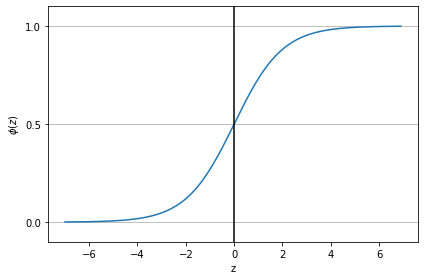

In [9]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)          # 元のデータとシグモイド関数の出力をプロット
plt.axvline(0.0, color='k') # 垂直線を追加（z=0）
plt.ylim(-0.1, 1.1)         # ｙ軸の上限・下限を設定
plt.xlabel('z')             # ｘ軸のラベルを設定
plt.ylabel('$\phi (z)$')    # ｙ軸のラベルを追加
plt.yticks([0.0, 0.5, 1.0]) # y軸の目盛りを追加

ax = plt.gca()
ax.yaxis.grid(True) # ｙ軸の目盛りに合わせて水平グリッド線を追加

plt.tight_layout()
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plt_decision_regions(X, Y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cian')
    cmap = ListedColormap(colors[:len(np.unique(Y))])

    x1_min = X.iloc[:, 0].min()-1
    x1_max = X.iloc[:, 0].max()+1
    x2_min = X.iloc[:, 1].min()-1
    x2_max = X.iloc[:, 1].max()+1
    
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution), 
        np.arange(x2_min, x2_max, resolution)
    )
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, levels=1, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(Y)):
        plt.scatter(x=X.iloc[Y==cl, 0],
                    y=X.iloc[Y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

In [ ]:
dataset = df[(df["label"]==0) | (df["label"]==1)]
X = dataset[["petal length (cm)","petal width (cm)"]]
Y = dataset["label"].values

/home/yuta/miniconda3/envs/rapids-21.06/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


,No,X,Y,ouput,errors,w0,w1,cost
0,1,"[1.4, 0.2]",0,0.501656,-0.501656,3.531881,3.531881,69.887339
1,2,"[1.4, 0.2]",0,0.994724,-0.994724,-0.106429,-0.106429,276.284715
2,3,"[1.4, 0.2]",0,0.078387,-0.078387,8.883793,8.883793,107.469354
3,4,"[1.4, 0.2]",0,0.999997,-0.999997,5.228811,5.228811,NaN
4,5,"[1.4, 0.2]",0,0.992820,-0.992820,1.598166,1.598166,269.873169
5,6,"[1.4, 0.2]",0,0.059687,-0.059687,1.501928,1.501928,5.205576
6,7,"[1.4, 0.2]",0,0.046009,-0.046009,1.594169,1.594169,4.900885
7,8,"[1.4, 0.2]",0,0.049434,-0.049434,1.576633,1.576633,4.685436
8,9,"[1.4, 0.2]",0,0.044052,-0.044052,1.617690,1.617690,4.496263
9,10,"[1.4, 0.2]",0,0.043629,-0.043629,1.629853,1.629853,4.329407


/home/yuta/miniconda3/envs/rapids-21.06/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


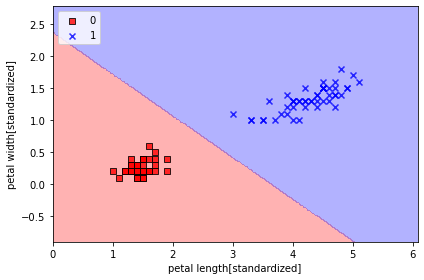

In [134]:
class LogisticRegressionGD:
    
    def __init__(self, eta=0.05, n_iter=20, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
        # ====================================
        self.index = []
        self.X_s = []
        self.Y_s = []
        self.ouput_s  = []
        self.errors_s = []
        self.w0_s = []
        self.w1_s = []
        self.cost_s = []
        # ====================================
        
    def fit(self, X, Y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (Y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0]  += self.eta * errors.sum()
            
            # コスト関数（対数尤度関数）
            # 注意点：通常の対数尤度関数は最大化を目指してるが、
            # 勾配降下法を用いて、最小化を目指すように対数尤度関数にマイナスをかけている。
            cost = -Y.dot(np.log(output)) - ((1-Y).dot(np.log(1-output))) 
            self.cost_.append(cost)
            
            # ====================================
            self.index.append(i+1)
            self.X_s.append(X[0:1].values[0])
            self.Y_s.append(Y[0])
            self.ouput_s.append(output[0])
            self.errors_s.append(errors[0])
            self.w0_s.append(self.w_[1:][0])
            self.w1_s.append(self.w_[1:][0])
            self.cost_s.append(cost)
            # ====================================
        
        # ====================================
        calc_df = pd.DataFrame()
        calc_df["No"] = self.index
        calc_df["X"] = self.X_s
        calc_df["Y"] = self.Y_s
        calc_df["ouput"] = self.ouput_s
        calc_df["errors"] = self.errors_s
        calc_df["w0"] = self.w0_s
        calc_df["w1"] = self.w1_s
        calc_df["cost"] = self.cost_s
        display(calc_df)
        # ====================================
            
        return self
    
    # 総入力を計算
    def net_input(self, X):
        return self.w_[0] + np.dot(X, self.w_[1:])
    
    # ロジスティックシグモイド関数（特徴量を入力すると、条件付き確率を出力する）
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    # 予測値の出力
    # (X >= 0.0)なら pred = 1
    # (X <= 0.0)なら pred = 0
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)


lrgd = LogisticRegressionGD()
lrgd.fit(X, Y)


plt_decision_regions(X=X, Y=Y, classifier=lrgd)
plt.xlabel("petal length[standardized]")
plt.ylabel("petal width[standardized]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [133]:
display(X[0:1])
print("予測確率：", lrgd.net_input(X[0:1])[0] )

,petal length (cm),petal width (cm)
0,1.4,0.2


予測確率： -3.147063333244605


### 課題
**ipynb ファイルを作成して、課題に取り組んでみてください。  
課題に進捗があれば、都度GitHub のリモートリポジトリにプッシュしてください。** 

- 1. sklearn ライブラリの LogisticRegression クラスを使用して、２値分類を行う。  
条件：  
  データセット：今回使用したIrisデータ  
  特徴量　　　：どれか２つ  
  目的変数　　：クラス（１ or ２）  
  
- 2. sklearn ライブラリの LogisticRegression クラスを使用して、３値分類を行う。  
条件：  
  データセット：今回使用したIrisデータ  
  特徴量　　　：４つ（全部）  
  目的変数　　：クラス（１ or ２ or ３）  
  

余裕があれば、特徴量（説明変数）を入れ替えながら、  
２値分類、３値分類を行って分類確率・分類精度を観察してみてください。  